In [1]:
from collections import Counter
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
X, y = make_classification(n_samples=1_000, n_features=10, n_classes=2, weights=(0.99,), flip_y=0.0, random_state=42)
X.shape, y.shape, Counter(y)

((1000, 10), (1000,), Counter({0: 990, 1: 10}))

<Axes: ylabel='count'>

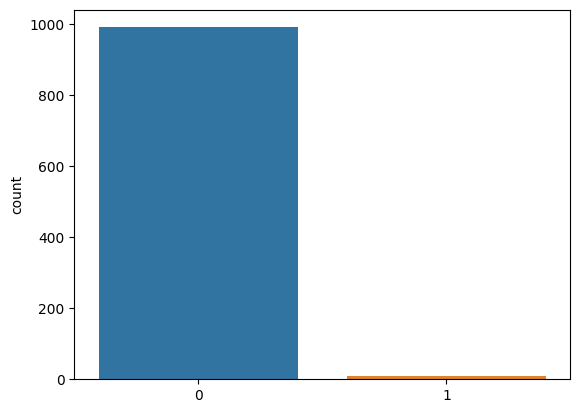

In [3]:
sns.countplot(x=y)

In [4]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X, y)
X_over.shape, y_over.shape, Counter(y_over)

((1485, 10), (1485,), Counter({0: 990, 1: 495}))

<Axes: ylabel='count'>

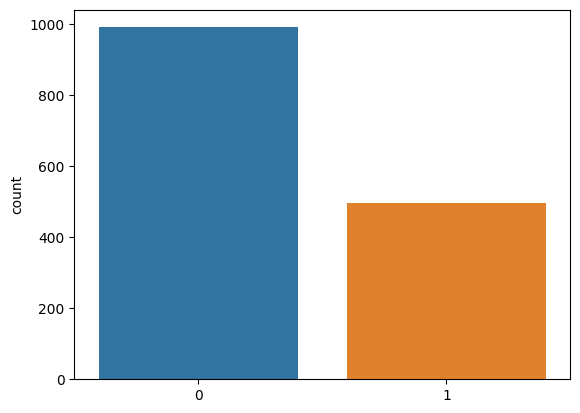

In [5]:
sns.countplot(x=y_over)

In [6]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
X_under.shape, y_under.shape, Counter(y_under)

((20, 10), (20,), Counter({0: 10, 1: 10}))

<Axes: ylabel='count'>

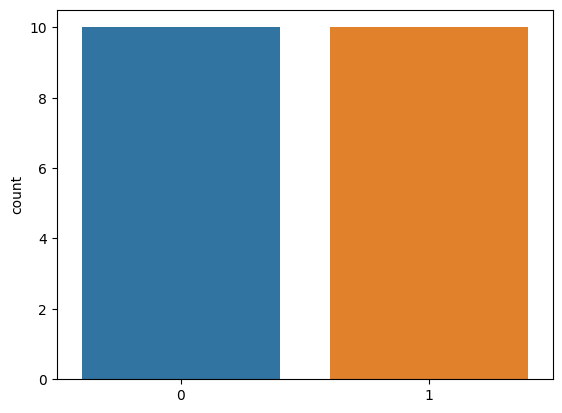

In [7]:
sns.countplot(x=y_under)

In [8]:
oversample = RandomOverSampler(sampling_strategy=0.1)
X_over, y_over = oversample.fit_resample(X, y)
X_over.shape, y_over.shape, Counter(y_over)

((1089, 10), (1089,), Counter({0: 990, 1: 99}))

In [9]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(X_over, y_over)
X_under.shape, y_under.shape, Counter(y_under)

((297, 10), (297,), Counter({0: 198, 1: 99}))

<Axes: ylabel='count'>

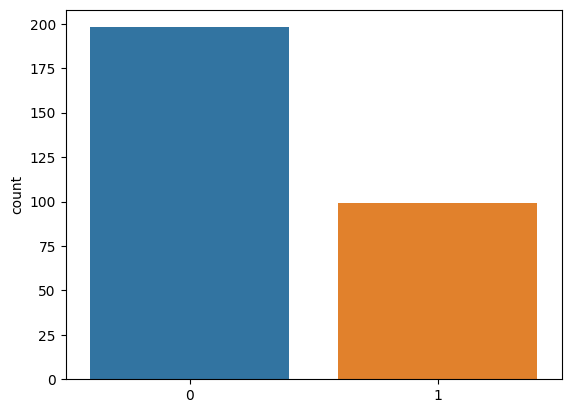

In [10]:
sns.countplot(x=y_under)

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X, y)
X_over.shape, y_over.shape, Counter(y_over)

((1980, 10), (1980,), Counter({0: 990, 1: 990}))

<Axes: ylabel='count'>

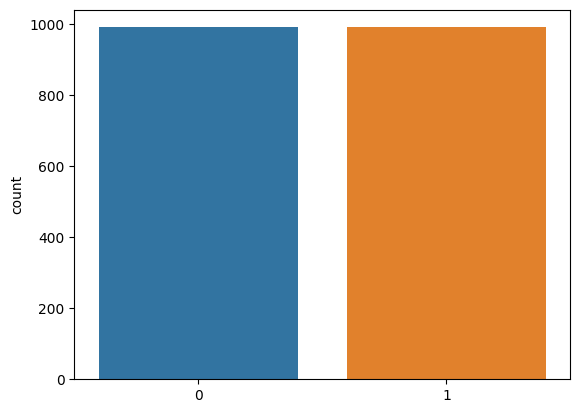

In [12]:
sns.countplot(x=y_over)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X)
x_pca.shape, Counter(y)

((1000, 2), Counter({0: 990, 1: 10}))

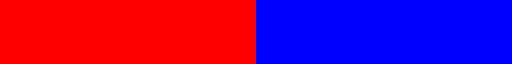

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'b'])
cmap

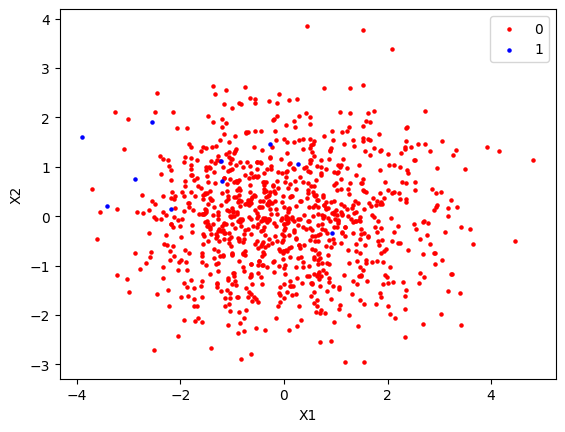

In [18]:
plt.scatter(x_pca[y == 0, 0], x_pca[y == 0, 1], s=5, color=cmap(0), label=0)
plt.scatter(x_pca[y == 1, 0], x_pca[y == 1, 1], s=5, color=cmap(1), label=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
x_pca_smote = pca.fit_transform(X_over)
x_pca_smote.shape, Counter(y_over)

((1980, 2), Counter({0: 990, 1: 990}))

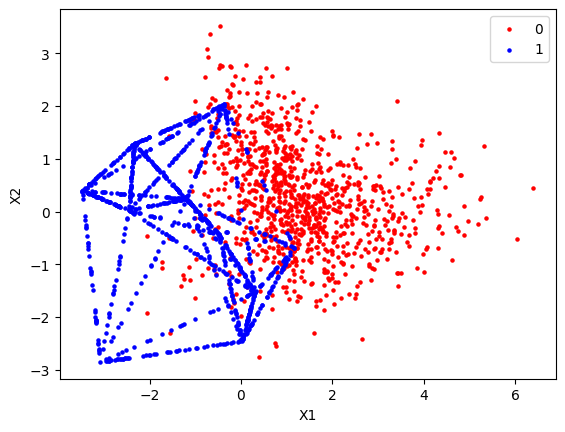

In [60]:
plt.scatter(x_pca_smote[y_over == 0, 0], x_pca_smote[y_over == 0, 1], s=5, color=cmap(0), label=0)
plt.scatter(x_pca_smote[y_over == 1, 0], x_pca_smote[y_over == 1, 1], s=5, color=cmap(1), label=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()